# Lab 5 - Data Visualization

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## NFL Offense Data

1. Import the NFL week 3, 4, and 5 data and add a week column to dataset and set the value to 3, 4, or 5 for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Also merge the nfl_teams.csv data to this dataframe so that the division and conference info is included.

In [36]:
w3 = pd.read_csv("nfloffenseweek3.csv")
w4 = pd.read_csv('nfloffenseweek4.csv')
w5 = pd.read_csv('nfloffenseweek5.csv')
w3["Week"] = 3
w4["Week"] = 4
w5["Week"] = 5
df= pd.concat([w3,w4,w5], axis =0)
extra_info = pd.read_csv("nfl_teams.csv")
final_df = extra_info.merge(df,left_on="Name", right_on = "team", how= 'inner')
final_df

,ID,Name,Abbreviation,Conference,Division,rank,team,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,1st_downs,passes_completed,passes_attempted,passing_yards,passing_touchdowns,passing_interceptions,net_yards_per_pass_attempt,passing_1st_downs,rushing_attempts,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_1st_downs,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,Week
0,1,Arizona Cardinals,ARI,NFC,West,13,Arizona Cardinals,3,62,1060,222,4.8,1,0,69,92,145,744,3,1,4.9,40,71,316,3,4.5,25,23,219,4,34.5,3.4,15.09,3
1,1,Arizona Cardinals,ARI,NFC,West,14,Arizona Cardinals,4,88,1398,292,4.8,2,0,89,115,177,950,5,2,5.2,50,108,448,4,4.1,33,30,280,6,36.6,4.9,8.95,4
2,1,Arizona Cardinals,ARI,NFC,West,18,Arizona Cardinals,5,105,1761,361,4.9,3,0,112,143,219,1189,6,3,5.2,66,134,572,5,4.3,40,32,295,6,36.0,6.0,21.28,5
3,2,Atlanta Falcons,ATL,NFC,South,9,Atlanta Falcons,3,80,1063,181,5.9,7,4,67,50,79,593,3,3,7.0,32,96,470,4,4.9,25,15,99,10,43.8,21.9,24.85,3
4,2,Atlanta Falcons,ATL,NFC,South,8,Atlanta Falcons,4,103,1396,236,5.9,8,4,86,57,98,724,3,4,6.9,38,131,672,6,5.1,36,16,114,12,44.2,18.6,30.77,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,30,Tampa Bay Buccaneers,TB,NFC,South,16,Tampa Bay Buccaneers,4,82,1268,245,5.2,6,5,77,106,155,1007,6,1,6.2,55,83,261,1,3.1,13,24,206,9,34.8,10.9,-3.64,4
89,30,Tampa Bay Buccaneers,TB,NFC,South,21,Tampa Bay Buccaneers,5,103,1688,320,5.3,6,5,103,141,207,1358,7,1,6.3,72,106,330,2,3.1,20,30,251,11,35.7,8.9,9.66,5
90,31,Tennessee Titans,TEN,AFC,South,24,Tennessee Titans,3,51,907,168,5.4,6,3,50,51,84,625,3,3,7.1,32,80,282,3,3.5,13,23,222,5,28.1,12.5,-2.94,3
91,31,Tennessee Titans,TEN,AFC,South,22,Tennessee Titans,4,75,1150,220,5.2,6,3,69,68,105,741,5,3,6.6,41,108,409,4,3.8,19,29,262,9,31.0,9.5,2.39,4


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

<BarContainer object of 96 artists>

<Figure size 1200x1200 with 0 Axes>

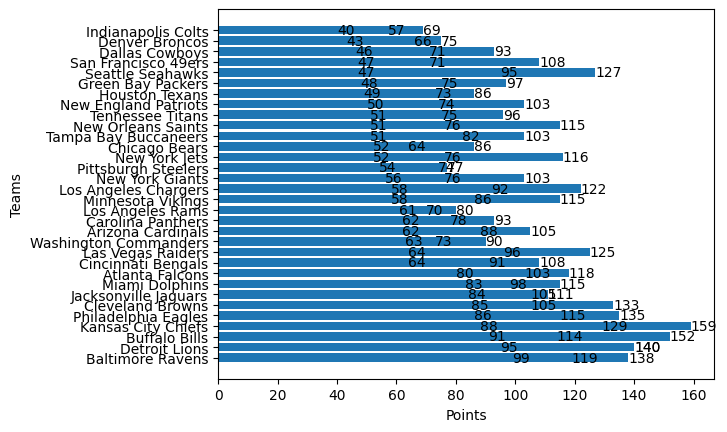

In [37]:
from matplotlib.pyplot import xlabel, ylabel


plt.figure(figsize=(12, 12))

fig, ax = plt.subplots()
barhplot = plt.barh(df.team, df.points_scored)
plt.bar_label(barhplot)
ax.set_xlabel("Points")
ax.set_ylabel("Teams")
barhplot

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

TypeError: unhashable type: 'numpy.ndarray'

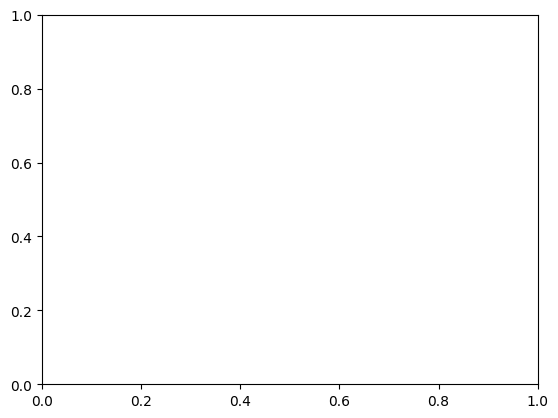

In [50]:

teams = final_df.groupby('Abbreviation')
run = final_df.rushing_yards.mean()
passing = final_df.passing_yards.mean()

vertplot = plt.bar(teams, run, color = "g", data= final_df)
vertplot2 = plt.bar(teams, passing, color = "r", data=final_df)
vertplot
vertplot2

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

C:\Users\Owner\AppData\Local\Temp\ipykernel_16044\3182111857.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  team_group = final_df.groupby("Abbreviation")['1st_downs','total_yards'].mean()


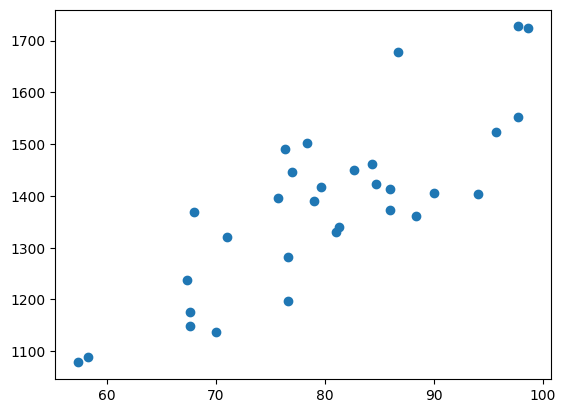

In [52]:
team_group = final_df.groupby("Abbreviation")['1st_downs','total_yards'].mean()
running_plt = plt.scatter(team_group['1st_downs'], team_group['total_yards'])
running_plt


5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

ValueError: x and y must have same first dimension, but have shapes (0,) and (3,)

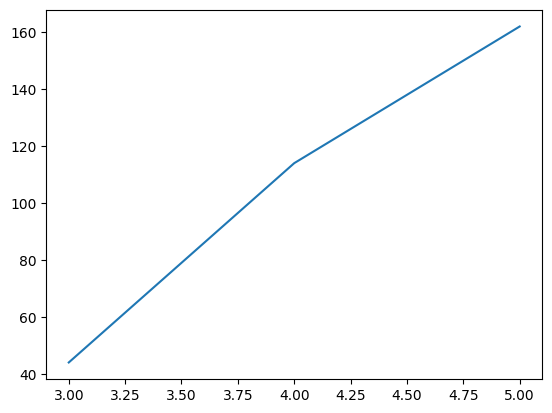

In [54]:
raven = final_df[(final_df.Name.str.contains("Baltimore Ravens"))]
ram = final_df[(final_df.Name.str.contains("LA Rams"))]
raven_line=plt.plot(raven.Week, raven.penalty_yards)
ram_line= plt.plot(ram.Week, raven.penalty_yards)
raven_line
ram_line


6. Plot the average total points vs average yards per play for each team as a bar chart (with total points on the y-axis and yards per play on the x-axis).

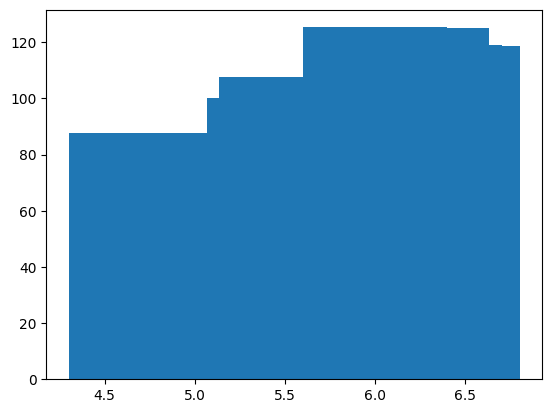

In [49]:
big_num = final_df.groupby("Abbreviation")
total_points = big_num.points_scored.mean()
gains = big_num.yards_per_play.mean()
big_bar = plt.bar(gains, total_points, data= final_df)

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

In [55]:
the_west = final_df[final_df.Conference == "NFC" & final_df.Division == "West"].groupby("team")
west_bar = plt.bar(the_west.team, the_west.penalty_yards)

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\axes\_axes.py:2340: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.asarray(self.convert_yunits(y))
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\lib\stride_tricks.py:538: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


TypeError: the dtypes of parameters y (object) and height (float64) are incompatible

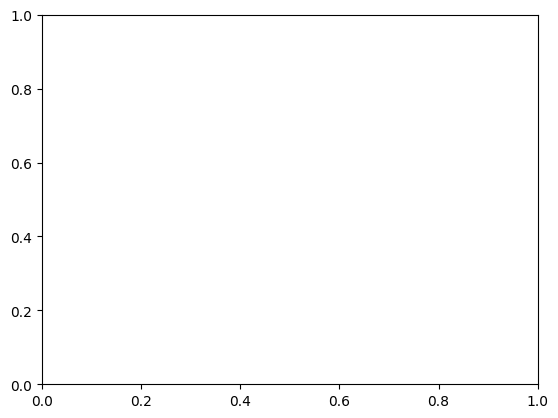

In [48]:
separation = final_df.groupby(['Conference', 'Division'])

final_bar = plt.barh(separation.Abbreviation, separation.points_scored)
final_bar